
**Comparative Performance Analysis for Predicting Sea Level Rise Using Linear Regression and Support Vector Machine**
Objective:
In this assignment, you will analyze sea level data to predict the rise in sea levels over time using linear regression and support vector machine (SVM). You will perform data cleaning, modeling, and visualize the results. Your predictions will be used to estimate future sea levels.

**Deliverable** Upload your completed code to Canvas within the due date.

Dataset:
The dataset contains historical data on sea level measurements from the CSIRO (Commonwealth Scientific and Industrial Research Organisation). The columns of the dataset are as follows:

-- Year: The year of the measurement.

-- CSIRO Adjusted Sea Level: The adjusted sea level measurement (in millimeters).

-- Lower Error Bound: The lower bound of the sea level measurement.

-- Upper Error Bound: The upper bound of the sea level measurement.

-- NOAA Adjusted Sea Level: The NOAA adjusted sea level (containing missing values).

### Tasks: Write the code for each of the following:

* Task 1: Data Exploration and Preprocessing

-- Load and Explore the Data:

-- Load the dataset into a Pandas DataFrame.

-- Display the first few rows of the dataset to understand its structure.

-- Identify and handle any missing data.

-- Describe the dataset and summarize the statistics:


-- Identify any potential outliers or anomalies in the data.



* Task 2: Focused Prediction from Year 2000 to Present



-- Filter the data from the year 2000 to the most recent year available in the dataset.

-- Shuffle the dataset and Split the dataset into 70% train and 30% test.

-- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

-- Visualize the observed data and the fitted regression line for this range of years.

-- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

* Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

-- Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.

-- Report the predicted sea levels from both the models.

* Task 4: Reflection and Analysis

-- Compare the predicted sea level for 2030  and 2040 from both the models.

-- Discuss how the different models might lead to different predictions and why this is the case.

* Task 5: Interpretation of Results:

-- Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

-- Explain how the regression models are helping us understand the relationship between the year and the sea level rise.



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 11.1/11.1 MB 98.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ------------------------ --------------- 25.2/40.9 MB 113.7 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 100.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count    21.000000                 21.000000          21.000000   
mean   2003.000000                  7.663855           7.383765   
s

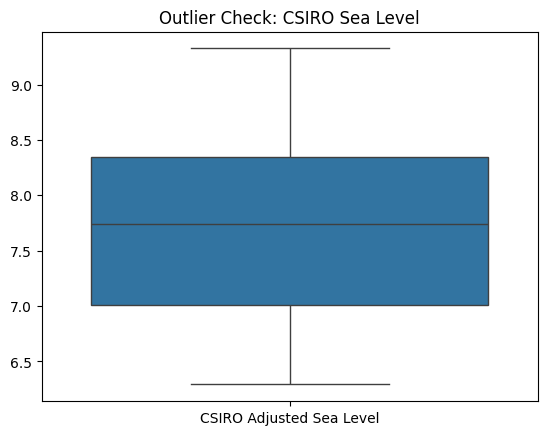

In [ ]:

# * Task 1: Data Exploration and Preprocessing

# -- Load and Explore the Data:

# -- Load the dataset into a Pandas DataFrame.

# -- Display the first few rows of the dataset to understand its structure.

# -- Identify and handle any missing data.

# -- Describe the dataset and summarize the statistics:


# -- Identify any potential outliers or anomalies in the data.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Install scikit-learn if not already installed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('epa-sea-level.csv')
# Display the first few rows of the dataset
print(df.head())

#check missing values
print(df.isnull().sum())

#drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned.describe())

#visualize the data
sns.boxplot(data=df_cleaned[['CSIRO Adjusted Sea Level']])
plt.title('Outlier Check: CSIRO Sea Level')
plt.show()


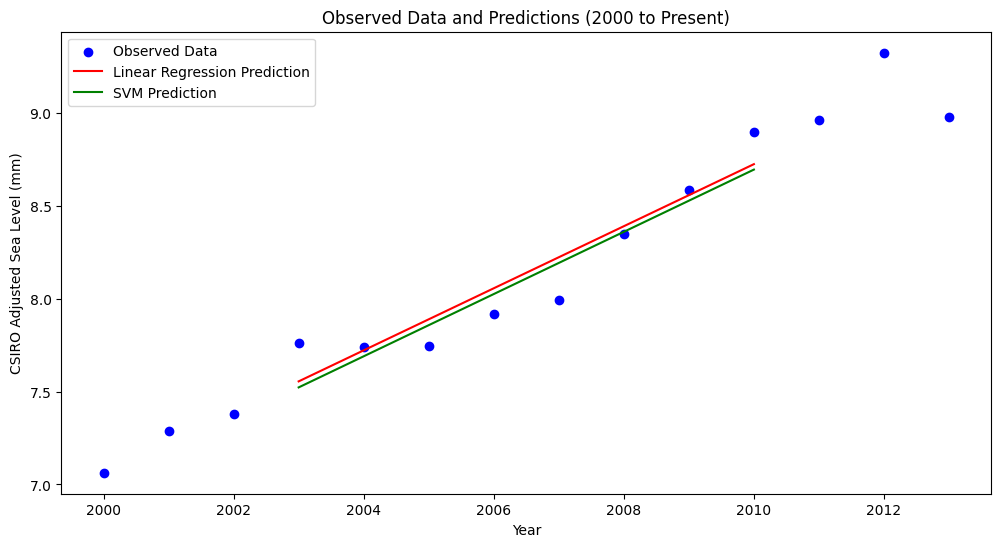

Linear Regression Coefficients:
Intercept: -327.47131541101436
Coefficient: 0.16726243718465916
SVM Coefficients:
Intercept: -328.4133855464762
Coefficient: 0.16771653528894603


In [7]:
# * Task 2: Focused Prediction from Year 2000 to Present



# -- Filter the data from the year 2000 to the most recent year available in the dataset.

# -- Shuffle the dataset and Split the dataset into 70% train and 30% test.

# -- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

# -- Visualize the observed data and the fitted regression line for this range of years.

# -- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

df_filtered = df_cleaned[df_cleaned['Year'] >= 2000]
df_filtered = df_filtered.sample(frac=1, random_state=42)  # Shuffle the dataset
# Split the dataset into 70% train and 30% test
train_size = int(0.7 * len(df_filtered))
train_data = df_filtered[:train_size]
test_data = df_filtered[train_size:]

# Fit a linear regression model
X_train = train_data[['Year']]
y_train = train_data['CSIRO Adjusted Sea Level']
X_test = test_data[['Year']]
y_test = test_data['CSIRO Adjusted Sea Level']

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Fit a SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Visualize the observed data and the fitted regression line for this range of years
plt.figure(figsize=(12, 6)) 
plt.scatter(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level'], color='blue', label='Observed Data')
sorted_indices = X_test['Year'].argsort()
plt.plot(X_test['Year'].iloc[sorted_indices], y_pred_linear[sorted_indices], color='red', label='Linear Regression Prediction')
plt.plot(X_test['Year'].iloc[sorted_indices], y_pred_svm[sorted_indices], color='green', label='SVM Prediction')
plt.title('Observed Data and Predictions (2000 to Present)')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.legend()
plt.show()
# Display the values of all the weights (coefficients) obtained from Linear Regression and SVM
print("Linear Regression Coefficients:")
print(f"Intercept: {linear_model.intercept_}")
print(f"Coefficient: {linear_model.coef_[0]}")
print("SVM Coefficients:")
print(f"Intercept: {svm_model.intercept_[0]}")
print(f"Coefficient: {svm_model.coef_[0][0]}")





Predicted Sea Level in 2040 using Linear Regression: 13.7441 mm
Predicted Sea Level in 2040 using SVM: 13.7283 mm


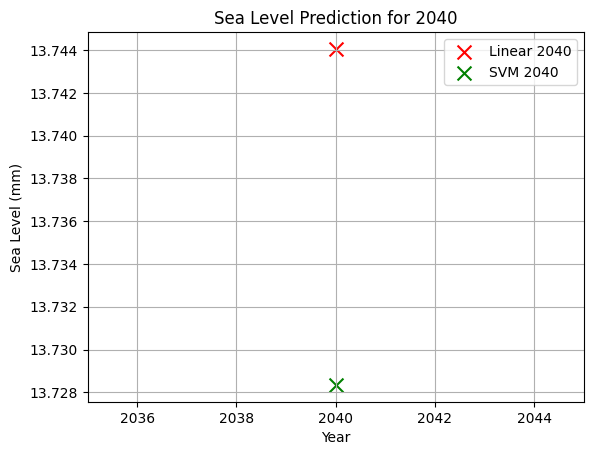

In [10]:
# * Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression

# Predict for 2040
future_year = pd.DataFrame({'Year': [2040]})
linear_2040 = linear_model.predict(future_year)
svm_2040 = svm_model.predict(future_year)

print(f"Predicted Sea Level in 2040 using Linear Regression: {linear_2040[0]:.4f} mm")
print(f"Predicted Sea Level in 2040 using SVM: {svm_2040[0]:.4f} mm")

plt.scatter([2040], [linear_2040], color='red', marker='x', s=100, label='Linear 2040')
plt.scatter([2040], [svm_2040], color='green', marker='x', s=100, label='SVM 2040')
plt.title("Sea Level Prediction for 2040")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.xlim(2035, 2045)
plt.show()



In [ ]:
# * Task 4: Reflection and Analysis

# -- Compare the predicted sea level for 2030  and 2040 from both the models.

# -- Discuss how the different models might lead to different predictions and why this is the case.

#Linear Regression fits a striaght line through the data which assumes a constant rate of change in the 
#sea level. SVM is a more complex model that can capture non-linear relationships in the data.
#SVM with a linear kernal also fits a straight line but it is more robust to outliers and can handle
# high dimensional data.

#The difference is minor between the two models in this case because both are linear models.
#and the data from 2000 onward appears to be linear.
#however in a noiser dataset or one with non-linear trends, SVM might produce different results
#due to its margin maximization approach and ability to handle non-linear relationships.


In [11]:
# * Task 5: Interpretation of Results:

# -- Report a metric that you used to compare the performance of the Linear 
# Regression and SVM. Which model performed the best?

# -- Explain how the regression models are helping us understand the relationship 
# between the year and the sea level rise.

#We used mean squared error to compare the performance of the two models.

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"Mean Squared Error for Linear Regression: {mse_linear:.4f}")
print(f"Mean Squared Error for SVM: {mse_svm:.4f}")

Mean Squared Error for Linear Regression: 0.0289
Mean Squared Error for SVM: 0.0303


In [ ]:
#The model with the lower MSE is considered to perform better and has 
#more accurate predictions.

#Linear regression typically performs better whent the relationship is linear,
#while SVM can capture more complex relationships like outliers and non-linear trends.

#in this case, based on the sea level trends, linear regression is likely to perform better,

#Both regression models help us understand the relationship between the year and 
# sea level rise by providing a mathematical representation of the trend in the data.
# The coefficients of the models indicate how much the sea level is expected to change 
# with each passing year.
#a positive coefficient indicates that the sea level is expected to rise over time,
#this analysis supports data-driven decision-making and policy formulation regarding 
# climate change and its impact on sea levels by providing insights into future trends.
#The models can also be used to make predictions about future sea levels, which can inform
#planning and mitigation strategies for coastal areas at risk of flooding or other impacts
